In [2]:
import pathlib
import pandas as pd
from dtv_backend.lock import Locks

In [3]:
df_met_afzetting = pd.read_csv('plots_routes/locks_with_afzetting_.csv', parse_dates=['Timestamp'])
df_zonder_afzetting = pd.read_csv('plots_routes/locks_without_afzetting_.csv', parse_dates=['Timestamp'])


In [4]:
locks_gdf = Locks(env=None).locks_gdf
locks_gdf_dict = locks_gdf.set_index('Id')['Name'].to_dict()

In [17]:
queues_met_afzetting = df_met_afzetting[['name', 'queue_a', 'queue_b']].groupby('name').max()
queues_zonder_afzetting = df_zonder_afzetting[['name', 'queue_a', 'queue_b']].groupby('name').max()
queues_all = pd.concat([queues_met_afzetting, queues_zonder_afzetting], axis=1, keys=['met_afzetting', 'zonder_afzetting']).sort_values(by=[('met_afzetting', 'queue_a'), ('met_afzetting', 'queue_b')], ascending=False).head(20)
queues_all.index = [queues_all.index, queues_all.index.map(locks_gdf_dict)]
queues_all.index.names = ['id', 'name']
namen = queues_all.index.get_level_values('name')
queues_all

met_afzetting          \
                                                  queue_a queue_b   
id       name                                                       
7069311  Doorslagsluis                              162.0     2.0   
1306537  Royerssluis                                 89.0     8.0   
50750    Oranjesluizen                               81.0    49.0   
33285    Zeeburgerschutsluis                         52.0    12.0   
22179    sluis Maasbracht                            35.0     3.0   
24504    sluis St. Andries                           31.0    22.0   
7070374  sluis 13                                    28.0     1.0   
55845    Nieuwe Meerschutsluis (SL 109)              19.0     2.0   
19922    Westerkanaalschutsluis                      16.0     2.0   
7804     Julianasluis                                13.0     2.0   
45980    sluis Amerongen                             12.0    37.0   
30443    Noordersluis Lelystad                       12.0     4.0   
42863    Volkeraksluizen                              9.0     7.0   
7069677  sluis Schijndel                              7.0     3.0   
39446    Krammersluizen                               6.0     6.0   
26499185 Scaldissluis                                 6.0     2.0   
1384622  SLUIS nr 11 VAN ST-JAN'S-MOLENBEEK           6.0     1.0   
36941    sluis Ternaaien (Lanaye (B))                 5.0    10.0   
25235    sluis Hansweert                              5.0     6.0   
28860    Prinses Irenesluis                           5.0     5.0   

                                            zonder_afzetting          
                                                     queue_a queue_b  
id       name                                                         
7069311  Doorslagsluis                                  28.0     2.0  
1306537  Royerssluis                                     4.0     2.0  
50750    Oranjesluizen                                  19.0     2.0  
33285    Zeeburgerschutsluis                             0.0     2.0  
22179    sluis Maasbracht                                1.0     2.0  
24504    sluis St. Andries                               1.0     4.0  
7070374  sluis 13                                        1.0     1.0  
55845    Nieuwe Meerschutsluis (SL 109)                  1.0     1.0  
19922    Westerkanaalschutsluis                          1.0     2.0  
7804     Julianasluis                                    NaN     NaN  
45980    sluis Amerongen                                 1.0     0.0  
30443    Noordersluis Lelystad                          60.0     5.0  
42863    Volkeraksluizen                                 3.0     3.0  
7069677  sluis Schijndel                                 1.0     1.0  
39446    Krammersluizen                                  3.0     0.0  
26499185 Scaldissluis                                    2.0     0.0  
1384622  SLUIS nr 11 VAN ST-JAN'S-MOLENBEEK              1.0     1.0  
36941    sluis Ternaaien (Lanaye (B))                   54.0     1.0  
25235    sluis Hansweert                                 3.0     3.0  
28860    Prinses Irenesluis                              2.0     2.0

D:\Users\ALPF\AppData\Local\Temp\ipykernel_22240\1015055899.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

D:\Users\ALPF\AppData\Local\Temp\ipykernel_22240\1015055899.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 0.98, 'Wachtrij lengte bij Doorslagsluis')

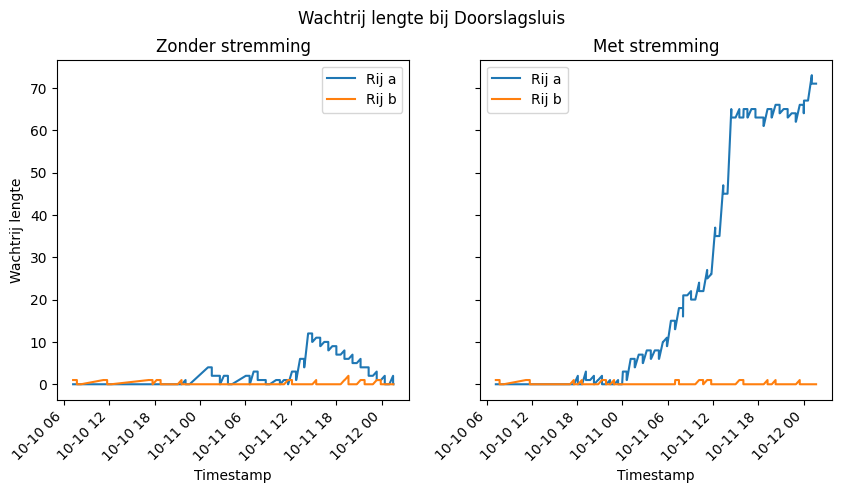

In [7]:
import matplotlib.pyplot as plt
lock = 7069311
df_met_afzetting_lock = df_met_afzetting[df_met_afzetting['name']==lock].set_index('Timestamp')
df_zonder_afzetting_lock = df_zonder_afzetting[df_zonder_afzetting['name']==lock].set_index('Timestamp')
fig, axs=plt.subplots(1, 2, figsize=(10, 5), sharey=True)
df_met_afzetting_lock.plot(y=['queue_a', 'queue_b'], ax=axs[1], title='Met stremming')
axs[1].legend(['Rij a', 'Rij b'])
df_zonder_afzetting_lock.plot(y=['queue_a', 'queue_b'], ax=axs[0], title='Zonder stremming')
axs[0].legend(['Rij a', 'Rij b'])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[0].set_ylabel('Wachtrij lengte')
fig.suptitle('Wachtrij lengte bij {}'.format(locks_gdf_dict[lock]))
# round xlabel times to nearest hour
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

In [26]:
import geopandas as gpd

vessels_log_without_afzetting = gpd.read_file('plots_routes/trajectories_without_afzetting.gpkg')
vessels_log_with_afzetting = gpd.read_file('plots_routes/trajectories_with_afzetting.gpkg')


In [46]:
vessels_log_without_afzetting['t'] = pd.to_datetime(vessels_log_without_afzetting['t'], format='ISO8601', yearfirst=True)
vessels_log_with_afzetting['t'] = pd.to_datetime(vessels_log_with_afzetting['t'], format='ISO8601', yearfirst=True)

grouped_with_afzetting = vessels_log_with_afzetting.groupby('object_id')['t'].agg(['max', 'min'])
grouped_with_afzetting['max'][grouped_with_afzetting['max']>pd.Timestamp('2023-10-13')] =pd.Timestamp('2023-10-13')
grouped_with_afzetting['time'] = grouped_with_afzetting['max'] - grouped_with_afzetting['min']

grouped_without_afzetting = vessels_log_without_afzetting.groupby('object_id')['t'].agg(['max', 'min'])
grouped_without_afzetting['max'][grouped_without_afzetting['max']>pd.Timestamp('2023-10-13')] =pd.Timestamp('2023-10-13')
grouped_without_afzetting['time'] = grouped_without_afzetting['max'] - grouped_without_afzetting['min']

vessel_times_df = pd.concat([grouped_with_afzetting, grouped_without_afzetting], axis=1, keys=['met_afzetting', 'zonder_afzetting']).dropna()
vessel_times_df['difference (h)'] = (vessel_times_df[('zonder_afzetting', 'max')] - vessel_times_df[('met_afzetting', 'max')]).dt.total_seconds()/60/60

D:\Users\ALPF\AppData\Local\Temp\ipykernel_22240\477668571.py:5: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


D:\Users\ALPF\AppData\Local\Temp\ipykernel_22240\477668571.py:9: FutureWarning:

ChainedAssignmentError: behaviour will change in 

In [47]:
vessels_log_with_afzetting.groupby('object_id').apply(lambda x: x).loc['vessel_1000813']
#vessel_times_df.sort_values(by='difference (h)', ascending=True).head(10)

D:\Users\ALPF\AppData\Local\Temp\ipykernel_22240\2467626684.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Message,Value,trajectory_id,object_id,t,prev_t,geometry
0,Sailing from node 8866373 to node B13418_B sub...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-11 20:05:06.930000,2023-10-11T20:00:00,"LINESTRING (4.52639 52.14250, 4.53075 52.14185)"
1,Sailing from node 8866373 to node B13418_B sub...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-11 20:05:38.169998,2023-10-11T20:05:06.930000,"LINESTRING (4.53075 52.14185, 4.53117 52.14174)"
2,Sailing from node 8866373 to node B13418_B sub...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-11 20:06:52.348999,2023-10-11T20:05:38.169998,"LINESTRING (4.53117 52.14174, 4.53217 52.14149)"
3,Sailing from node 8866373 to node B13418_B sub...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-11 20:07:57.363998,2023-10-11T20:06:52.348999,"LINESTRING (4.53217 52.14149, 4.53308 52.14131)"
4,Sailing from node 8866373 to node B13418_B sub...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-11 20:08:53.542999,2023-10-11T20:07:57.363998,"LINESTRING (4.53308 52.14131, 4.53387 52.14118)"
...,...,...,...,...,...,...,...
638,Sailing from node 8865128 to node 8865003 sub ...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-14 03:27:22.219000,2023-10-14T03:25:57.306000,"LINESTRING (4.63502 51.80280, 4.63398 51.80238)"
639,Sailing from node 8865128 to node 8865003 sub ...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-14 03:32:42.570000,2023-10-14T03:27:22.219000,"LINESTRING (4.63398 51.80238, 4.62969 51.80128)"
640,Sailing from node 8865003 to node 8866472 sub ...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-14 03:34:00.576000,2023-10-14T03:32:42.570000,"LINESTRING (4.62969 51.80128, 4.62865 51.80100)"
641,Sailing from node 8866472 to node 8863665 sub ...,0,vessel_1000813_trip_1,vessel_1000813,2023-10-14 03:42:40.537998,2023-10-14T03:34:00.576000,"LINESTRING (4.62865 51.80100, 4.62129 51.80000)"


In [10]:
vessel_times_df.to_csv('plots_routes/vessel_times.csv')

(-10.0, 30.0)

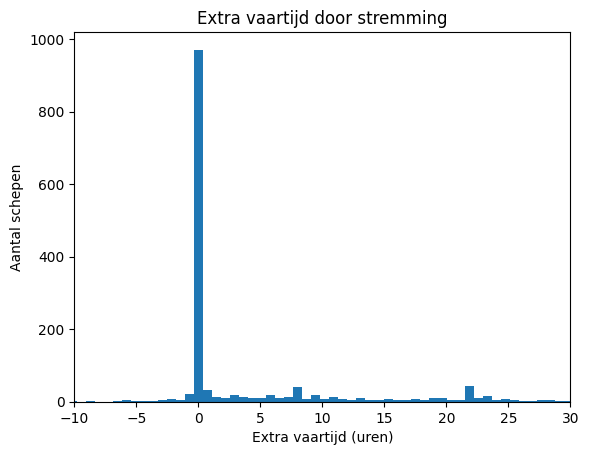

In [52]:
vessel_times_df['difference (h)'].plot(kind='hist', bins=100, title='Extra vaartijd door stremming', ylabel='Aantal schepen', xlabel='Extra vaartijd (uren)')
plt.xlim(-10, 30)

In [6]:
import os
from moviepy.editor import * 
image_folder_without_afzetting=r'D:\Users\ALPF\Documents\projecten\Digital twin vaarwegen\digitaltwin-waterway\dtv_backend\plots_routes\trajectories without afzetting'
image_folder_with_afzetting=r'D:\Users\ALPF\Documents\projecten\Digital twin vaarwegen\digitaltwin-waterway\dtv_backend\plots_routes\trajectories with afzetting'

fps=13

image_files_without_afzetting = [os.path.join(image_folder_without_afzetting,img)
               for img in os.listdir(image_folder_without_afzetting)
               if img.endswith(".png")]

image_files_with_afzetting = [os.path.join(image_folder_with_afzetting,img)
               for img in os.listdir(image_folder_with_afzetting)
               if img.endswith(".png")]
               
clip_without_afzetting = ImageSequenceClip(image_files_without_afzetting, fps=fps)
clip_with_afzetting = ImageSequenceClip(image_files_with_afzetting, fps=fps)

clip_without_afzetting.write_videofile(r'D:\Users\ALPF\Documents\projecten\Digital twin vaarwegen\digitaltwin-waterway\dtv_backend\plots_routes\video_without_afzetting.mp4')
clip_with_afzetting.write_videofile(r'D:\Users\ALPF\Documents\projecten\Digital twin vaarwegen\digitaltwin-waterway\dtv_backend\plots_routes\video_with_afzetting.mp4')
#clip.ipython_display(width = 360)  


Moviepy - Building video plots_routesideo_without_afzetting.mp4.
Moviepy - Writing video plots_routesideo_without_afzetting.mp4



t:   0%|          | 0/288 [00:00<?, ?it/s, now=None]

OSError: [Errno 22] Invalid argument

MoviePy error: FFMPEG encountered the following error while writing file plots_routesideo_without_afzetting.mp4:

 b'plots_routes\x0bideo_without_afzetting.mp4: Invalid argument\r\n'